In [1]:
from dataloader import *
import json
config_data = json.load(open('./config/pretrain_resnet_tagger.json', 'r'))

# Currently 3 modes of dataloading are available

In [2]:
# normal things
vocab, train_data_loader, val_data_loader, test_data_loader = get_datasets(config_data)
for i, (images, ingt, title, ing, ins, img_id) in enumerate(train_data_loader):
    
    print(f'image shape: {images.shape}')
    print(f'ingredient list shape: {ingt.shape}')
    print(f'ingredient as words: {ing.shape}')
    print(f'instruction: {ins.shape}')
    break

Using the saved vocab.
image shape: torch.Size([64, 3, 256, 256])
ingredient list shape: torch.Size([64, 3144])
ingredient as words: torch.Size([64, 175])
instruction: torch.Size([64, 502])


In [3]:
# load images and ALL embeddings (will be useful for Ashish's attention LSTM I think)
vocab, train_data_loader, val_data_loader, test_data_loader = get_datasets(config_data, ingd_embed = True)
for i, (images, ing_embed) in enumerate(train_data_loader):
    print(f'image shape: {images.shape}')
    print(f'ing embed shape: {ing_embed.shape}')
    break
    #if images.shape[0]!=ingt.shape[0]:
        #print(images.shape), print(ingt.shape)

Using the saved vocab.
image shape: torch.Size([64, 3, 256, 256])
ing embed shape: torch.Size([64, 16, 50])


In [4]:
# load images, unmaked and masked embedding (useful to training Resnet attention)
vocab, train_data_loader, val_data_loader, test_data_loader = get_datasets(config_data, ingd_embed = True, mask = True)
for i, (images, unmasked_embed, masked_embed) in enumerate(train_data_loader):
    print(f'image shape: {images.shape}')
    print(f'unmask embed shape: {unmasked_embed.shape}')
    print(f'mask embed shape: {masked_embed.shape}')
    break
    #if images.shape[0]!=ingt.shape[0]:
        #print(images.shape), print(ingt.shape)

Using the saved vocab.
image shape: torch.Size([64, 3, 256, 256])
unmask embed shape: torch.Size([64, 16, 50])
mask embed shape: torch.Size([64, 50])


In [5]:
len(vocab) # same object as PA4

9467

# How to from img_id to img

In [6]:
help(find_img_path)

Help on function find_img_path in module dataloader:

find_img_path(imgid, root='/Users/ashishfarande/Desktop/UCSD/Courses/Winter 22/CSE 251B/Final Project/DeepRecipe/data/images')



In [7]:
find_img_path(img_id[0])

'/Users/ashishfarande/Desktop/UCSD/Courses/Winter 22/CSE 251B/Final Project/DeepRecipe/data/images/8/a/0/e/8a0e1c6083.jpg'

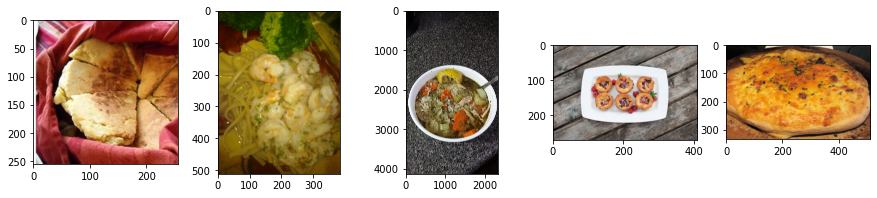

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
f, ax = plt.subplots(1,5, figsize = (15,3))
for i in range(5):
    img=mpimg.imread(find_img_path(img_id[i]))
    # end
    # from now on you can use img as an image, but make sure you know what you are doing!
    imgplot=ax[i].imshow(img)
    

# Playing with models

In [9]:
# copied from model_factory, feel free to add lines to print shapes of each tensor to understand what happened
from model_factory import *
from Models.Baseline import *

In [10]:
r = Baseline(outdim = ingt.shape[1])

In [11]:
x = r(images)

In [12]:
x.size()

torch.Size([64, 3144])

In [13]:
ingt.shape

torch.Size([64, 3144])

In [14]:
criterion = nn.BCELoss()
criterion(x, ingt)

tensor(0.7097, grad_fn=<BinaryCrossEntropyBackward0>)

# Some classification metrices: F1, prec/recall

In [15]:
from classification_metrics import *

In [16]:
evl=calculate_metrics(x.detach().numpy(), ingt.detach().numpy())

<AxesSubplot:>

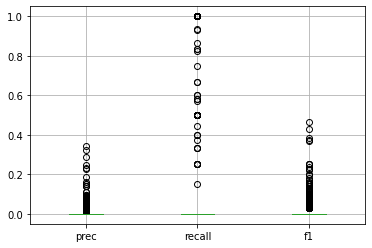

In [17]:
evl.boxplot()